In [28]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [14]:
pokemon_df = pd.read_csv("pokemon.csv")
pokemon_df = pokemon_df.drop(['Name', '#', 'Type 1', 'Type 2', 'Generation'], axis=1)
print(pokemon_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Total      800 non-null    int64
 1   HP         800 non-null    int64
 2   Attack     800 non-null    int64
 3   Defense    800 non-null    int64
 4   Sp. Atk    800 non-null    int64
 5   Sp. Def    800 non-null    int64
 6   Speed      800 non-null    int64
 7   Legendary  800 non-null    bool 
dtypes: bool(1), int64(7)
memory usage: 44.7 KB
None


In [15]:
print(pokemon_df.head())

   Total  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  Legendary
0    318  45      49       49       65       65     45      False
1    405  60      62       63       80       80     60      False
2    525  80      82       83      100      100     80      False
3    625  80     100      123      122      120     80      False
4    309  39      52       43       60       50     65      False


Let's determine the top two features that impact whether a pokemon is legendary
using a heatmap

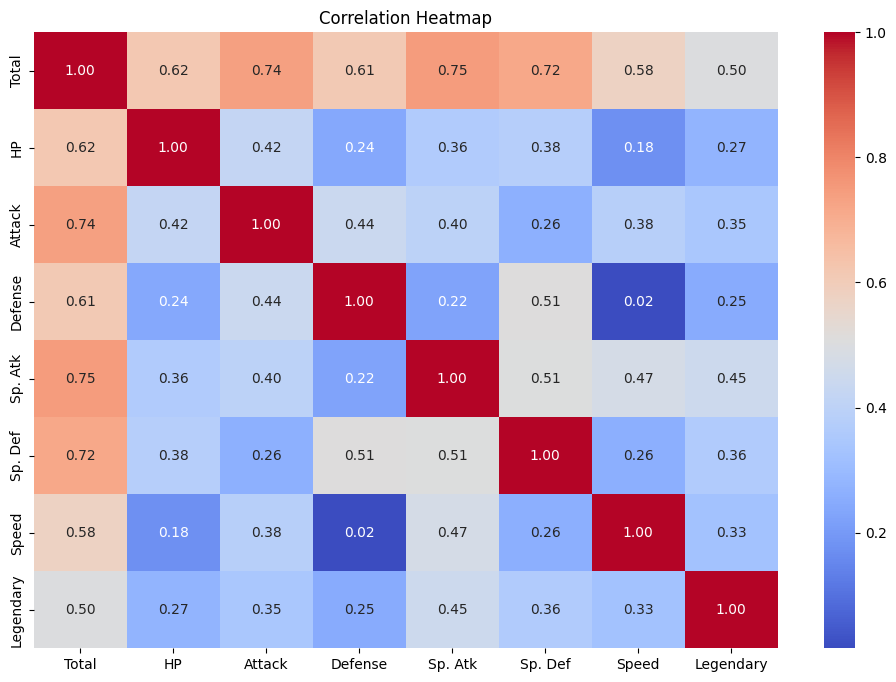

In [19]:
corr_matrix = pokemon_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


Based on the heatmap, the top two features that are most have the most correlation with Legendary is Sp. Atk and Total (Sum of all other stats)\
Let's now split the data to the features and target value


In [120]:
X = pokemon_df[["Sp. Atk", "Total"]]
y = pokemon_df["Legendary"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Make Predictions
y_pred = knn.predict(X_test)

# Evaluate the Model
print("Accuracy:", accuracy_score(y_test, y_pred))
labels = [False, True]
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred, labels=labels))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.95625
Confusion Matrix:
 [[147   3]
 [  4   6]]
Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.98      0.98       150
        True       0.67      0.60      0.63        10

    accuracy                           0.96       160
   macro avg       0.82      0.79      0.80       160
weighted avg       0.95      0.96      0.96       160



In [113]:
single_entry = pd.DataFrame({'Sp. Atk': [50], 'Total': [200]})
single_entry = scaler.transform(single_entry)
single_pred = knn.predict(single_entry)
print(single_pred)

[False]
